<a href="https://colab.research.google.com/github/Extra0rdinaire/carma_python/blob/main/Yet_another_copy_of_Comments_Classification_about_Immigrants_(Keyword_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Importing Dependancies

In [1]:
import numpy as np
import math
import re
import pandas as pd
import random
from google.colab import drive

In [2]:
!pip install bert-for-tf2
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=9d5f782fce78a36ecc1f2381973cace9eb17b8a83328b78b24e3e609e7147ccb
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19454 sha256=6c93c5943bd8a17e6f20d9d005158866d55565a522ba35164f0b60c27a04de11
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7891 sha256=3fddb5313637f2577e908d98f1731fd50560dd044fe7ebba0ab0dc42b2760c78
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e908768

Bert libraries

In [3]:
import tensorflow as tf


import tensorflow_hub as hub

from tensorflow.keras import layers

import bert

# 2- Data Processing

import files from Google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


define dataframe

In [5]:
cols=["text","Class","Class Labels","Sentiment","Sentiments Labels"]
df = pd.read_csv(
    '/content/drive/MyDrive/CLAIRE/Labeled Dataset .csv',
    header=None,
    names=cols
)




In [6]:
df.head()

,text,Class,Class Labels,Sentiment,Sentiments Labels
0,"! If come elections, nothing changes it's time...",Anti-Immigrants,4,Negative,0
1,#Rohingya means illegal person who any how com...,Anti-Immigrants,4,Negative,0
2,$20M tax payer public money can help A Lot of ...,Self Victimization,2,Negative,0
3,". As if CECA alone is not enough, need more pr...",Anti-Immigrants,4,Negative,0
4,. The room probly did not laugh becos of turba...,Anti-Immigrants,4,Negative,0


In [7]:
df.drop(["Sentiment","Sentiments Labels"],
          axis=1,
          inplace=True)

In [8]:
df.isna().sum()

text            0
Class           0
Class Labels    0
dtype: int64

In [9]:
df=df.dropna(axis=0)

In [10]:
df.isna().sum()

text            0
Class           0
Class Labels    0
dtype: int64

In [11]:
df.head()

,text,Class,Class Labels
0,"! If come elections, nothing changes it's time...",Anti-Immigrants,4
1,#Rohingya means illegal person who any how com...,Anti-Immigrants,4
2,$20M tax payer public money can help A Lot of ...,Self Victimization,2
3,". As if CECA alone is not enough, need more pr...",Anti-Immigrants,4
4,. The room probly did not laugh becos of turba...,Anti-Immigrants,4


In [12]:
df['Class'].value_counts()

Non Immigrant Related    2341
Self Victimization        621
Anti-Immigrants           510
Blame                     339
Pro-Immigrants            210
Name: Class, dtype: int64

#3- Balancing Dataframe

In [13]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(df['text'].values.reshape(-1,1), df['Class'])

In [14]:
X_over_2, y_over_2 = oversample.fit_resample(X_over, y_over)

In [15]:
y_over_2.value_counts()

Blame                    2341
Non Immigrant Related    2341
Pro-Immigrants           2341
Self Victimization        621
Anti-Immigrants           510
Name: Class, dtype: int64

In [16]:
X_over_3, y_over_3 = oversample.fit_resample(X_over_2, y_over_2)

In [17]:
y_over_3.value_counts()

Anti-Immigrants          2341
Blame                    2341
Non Immigrant Related    2341
Pro-Immigrants           2341
Self Victimization        621
Name: Class, dtype: int64

In [18]:
X_over_4, y_over_4 = oversample.fit_resample(X_over_3, y_over_3)

In [19]:
y_over_4.value_counts()

Anti-Immigrants          2341
Self Victimization       2341
Blame                    2341
Non Immigrant Related    2341
Pro-Immigrants           2341
Name: Class, dtype: int64

In [20]:
X_over_final = X_over_4.flatten()
type(y_over_3)

pandas.core.series.Series

In [21]:
X_over_final

array(["! If come elections, nothing changes it's time for migration! In the end we will all lose our jobs to these foreigners! They will grant them PR and these TRASH will in turn vote them to keep them afloat! Cycle continues, if after hearing",
       '#Rohingya means illegal person who any how coming from BANGLADESH.',
       '$20M tax payer public money can help A Lot of such case.... a lot of "LOCAL SINGAPOREAN "',
       ...,
       'SINGAPORE. INDIA also has nuclear missiles leh, that why all those agreements are signed to open the floodgates',
       'Nowaday I dont go across to Malaysia that often than before .. personally I feel .. this HSR would benefit Malaysians than SINGAPOREANS, esp blue collars workers from Malaysia .. For SINGAPOREANS most likely to fly across',
       'Just put it plain and simple. SINGAPORE is no longer SINGAPORE and not SINGAPOREAN first anymore. SINGAPORE is for everyone.'],
      dtype=object)

In [22]:
d = {'text': X_over_final, 'Class': list(y_over_4)}

In [23]:
bal_df = pd.DataFrame(data=d)

In [24]:
bal_df

,text,Class
0,"! If come elections, nothing changes it's time...",Anti-Immigrants
1,#Rohingya means illegal person who any how com...,Anti-Immigrants
2,$20M tax payer public money can help A Lot of ...,Self Victimization
3,". As if CECA alone is not enough, need more pr...",Anti-Immigrants
4,. The room probly did not laugh becos of turba...,Anti-Immigrants
...,...,...
11700,ESCAPE Jail cause he is TRASH FT! Can a member...,Self Victimization
11701,My question is how to deal with Malaysians who...,Self Victimization
11702,SINGAPORE. INDIA also has nuclear missiles leh...,Self Victimization
11703,Nowaday I dont go across to Malaysia that ofte...,Self Victimization


# 4- Cleaning Text

In [25]:
!pip install contractions
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import re
import contractions

def text_Preprocessing(text):
  def remove_emoji(text):
    emoji_pattern = re.compile("["
                    u"\U0001F600-\U0001F64F"
                    u"\U0001F300-\U0001F5FF"
                    u"\U0001F680-\U0001F6FF"
                    u"\U0001F1E0-\U0001F1FF"
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
  reviews =[contractions.fix(text) for text in text]
  reviews =[text.lower() for text in reviews]
  reviews =[re.sub(r'\S+@\S+','',text) for text in reviews]
  reviews =[re.sub(r'\d+','',text) for text in reviews]
  reviews =[re.sub(r'[^\w\s]','',text) for text in reviews]
  reviews = [re.sub(r'https?://[A-za-z0-9./]+','',text) for text in reviews]
  reviews = [re.sub(r'@[A-Za-z0-9]+','',text) for text in reviews]
  reviews =[text.strip() for text in reviews]
  reviews =[remove_emoji(text) for text in reviews]

  stop_words=set(stopwords.words('english'))
  cleaned_reviews=[]
  for review in reviews:
    tokens =[word for word in word_tokenize(review) if not word in stop_words]
    cleaned_reviews.append(" ".join(tokens))

  lemmatizer = WordNetLemmatizer()
  lem_reviews=[]
  for review in cleaned_reviews:
    lem_reviews.append(" ".join(list(map(lemmatizer.lemmatize , word_tokenize(review)))))

  return lem_reviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.9 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
t=bal_df['text']
bal_df['text']=text_Preprocessing(t)

bal_df.head()

,text,Class
0,come election nothing change time migration en...,Anti-Immigrants
1,rohingya mean illegal person coming bangladesh,Anti-Immigrants
2,tax payer public money help lot case lot local...,Self Victimization
3,cecum alone enough need propaganda tell u acce...,Anti-Immigrants
4,room probly laugh becos turban fly understand ...,Anti-Immigrants


In [27]:
possible_labels = bal_df['Class'].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Anti-Immigrants': 0,
 'Self Victimization': 1,
 'Blame': 2,
 'Non Immigrant Related': 3,
 'Pro-Immigrants': 4}

In [28]:
bal_df['label'] = bal_df["Class"].replace(label_dict)
bal_df.head()

,text,Class,label
0,come election nothing change time migration en...,Anti-Immigrants,0
1,rohingya mean illegal person coming bangladesh,Anti-Immigrants,0
2,tax payer public money help lot case lot local...,Self Victimization,1
3,cecum alone enough need propaganda tell u acce...,Anti-Immigrants,0
4,room probly laugh becos turban fly understand ...,Anti-Immigrants,0


In [29]:
texts = [text for text in df.text]

max_len = 0
text_len = []
for text in texts:
    text_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

print('Number of texts:', len(texts))
print('Max length of the texts:', max_len)
print('Mean length of the texts:', np.mean(text_len))

Number of texts: 4021
Max length of the texts: 1180
Mean length of the texts: 57.80552101467297


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-31-d6aaa0300efc>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


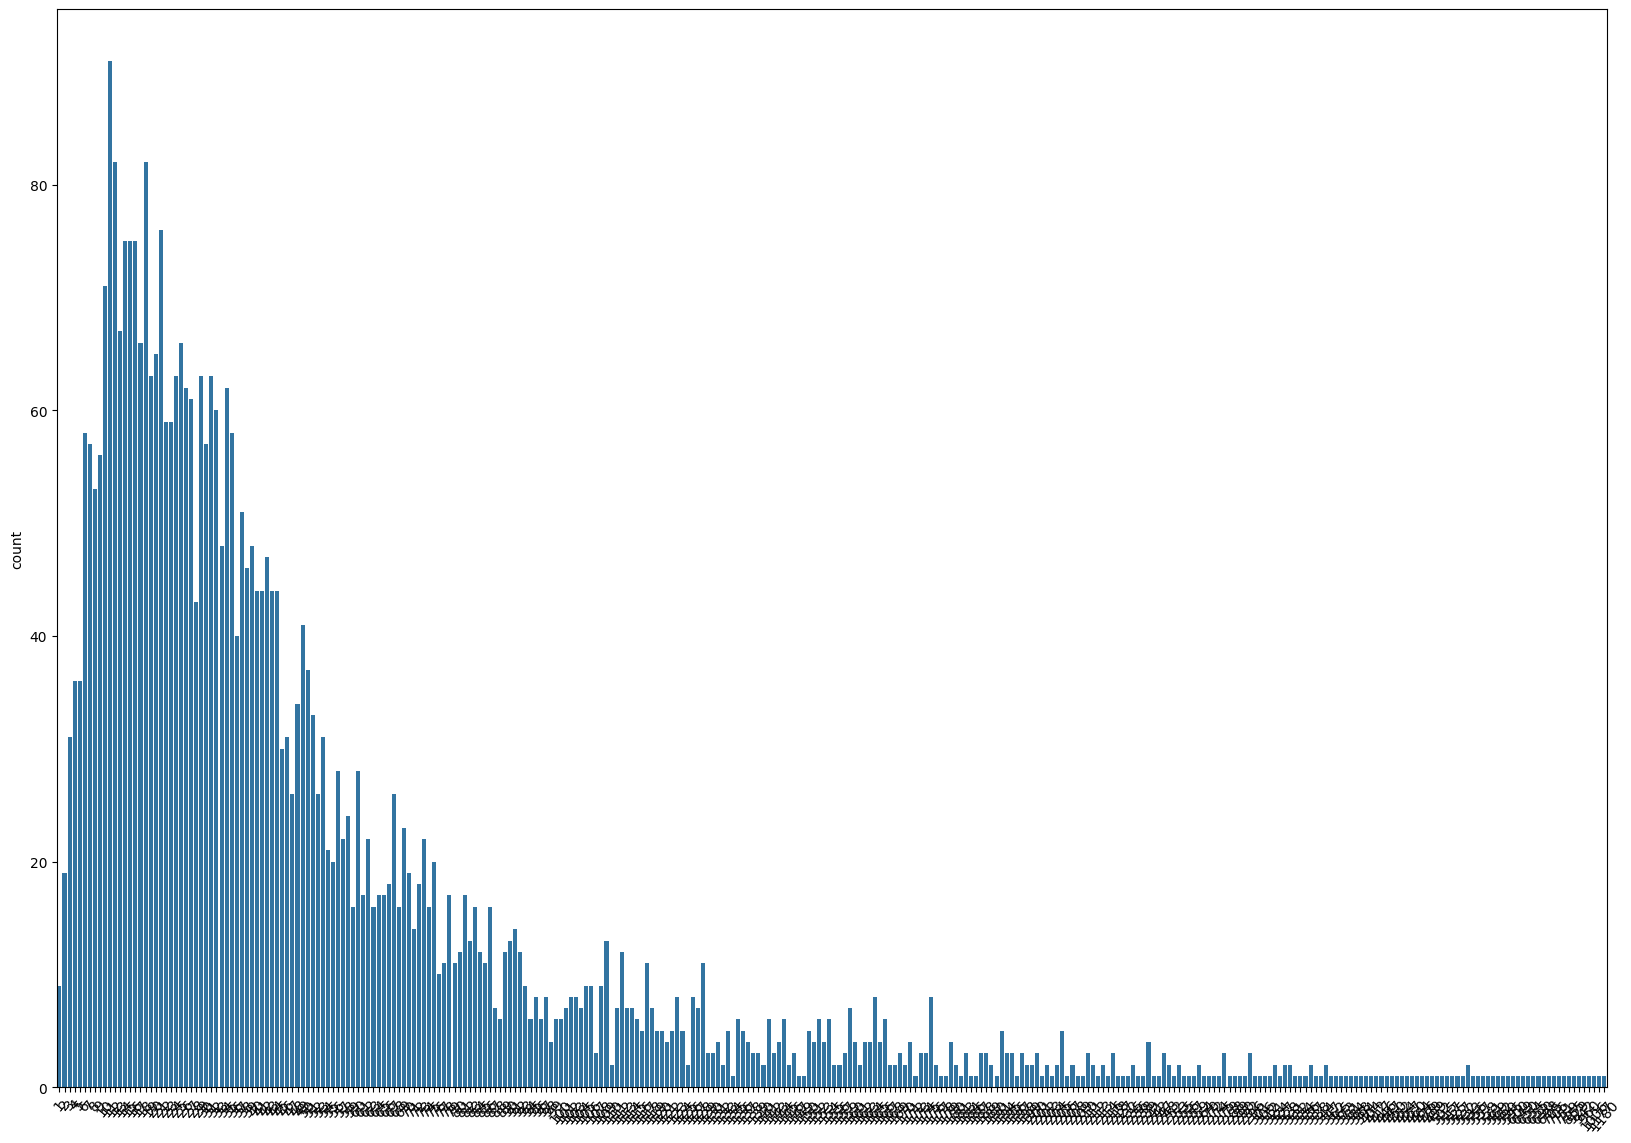

In [31]:
plt.figure(figsize=(20,14))
g = sns.countplot(x=text_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

# 5- Training/Validation Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val,y_train,y_val=train_test_split(
    bal_df.index.values,
    bal_df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=bal_df.label.values
    )

In [34]:
bal_df['data_type']=['not_set']*bal_df.shape[0]

In [35]:
bal_df.head()

,text,Class,label,data_type
0,come election nothing change time migration en...,Anti-Immigrants,0,not_set
1,rohingya mean illegal person coming bangladesh,Anti-Immigrants,0,not_set
2,tax payer public money help lot case lot local...,Self Victimization,1,not_set
3,cecum alone enough need propaganda tell u acce...,Anti-Immigrants,0,not_set
4,room probly laugh becos turban fly understand ...,Anti-Immigrants,0,not_set


In [36]:
bal_df.loc[X_train, 'data_type'] = 'train'
bal_df.loc[X_val, 'data_type'] = 'val'

In [37]:
bal_df.groupby(["Class","label","data_type"]).count()

text
Class                 label data_type      
Anti-Immigrants       0     train      1990
                            val         351
Blame                 2     train      1990
                            val         351
Non Immigrant Related 3     train      1990
                            val         351
Pro-Immigrants        4     train      1990
                            val         351
Self Victimization    1     train      1989
                            val         352

# 6- Tokenization and Encoding of Data

create a Bert layer to have access to meta data for the tokenizer

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install transformers

In [39]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [40]:
!pip install torchvision
import torch
import torchvision

In [41]:
# Create a function to tokenize a set of texts

#`encode will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs

encoded_data_train = tokenizer.batch_encode_plus(
    bal_df[bal_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=512,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    bal_df[bal_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    # Specify max lenght
    pad_to_max_length=True,
    max_length=512,
    return_tensors='pt'
)

# Convert other data types to torch.Tensor
    # Convert lists to tensors
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(bal_df[bal_df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(bal_df[bal_df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [42]:
# TensorDataset is a ready to use class to represent  data as list of tensors (vectors).
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [43]:
len(dataset_train)

9949

In [44]:
len(dataset_val)

1756

# 7- Setting up BERT Pretrained Model

In [45]:
from transformers import BertForSequenceClassification
# Instantiate Bert Classifier

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_dict),
    output_attentions=False,
    output_hidden_states=False
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 8- Create Data Dataloaders

In [46]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [47]:
# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 16

# Create the DataLoader for our training set

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

dataloader_validation = DataLoader(
    dataset_val,
    sampler=SequentialSampler(dataset_val),
    batch_size= 32
)

# 9- Setting up Optimizer and Scheduler

In [48]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [49]:
# Create the optimizer

optimizer = AdamW(
    model.parameters(),
    lr=1e-5,#2e-5>5e-5
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [50]:
epochs = 10

# # Total number of training steps and Set up the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloader_train)*epochs
)

# 10- Define Performance Metrics

In [51]:
from sklearn.metrics import f1_score

In [52]:
# Compute the average accuracy and loss over the validation set.

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [53]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

# 11 - Training Loop



```
adapted from old version of Hugging Face
```



In [54]:
import random

 # Set seed for reproducibility

seed_val = 32
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [56]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [57]:
from tqdm.notebook import tqdm

# Start training loop

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }
 # Compute loss and accumulate the loss values
        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

# clip gradient- give norm value to gradient

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

 # Update progress bar to set training loss

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'/content/drive/MyDrive/Colab Notebooks/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

#After the completion of each training epoch, measure the model's performance on our validation set.

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2583821544309903
Validation loss: 0.8219393632628701
F1 Score (Weighted): 0.6738927791115357


Epoch 2:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.6619535734176253
Validation loss: 0.4679490968923677
F1 Score (Weighted): 0.8389118581138071


Epoch 3:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.39603829217948905
Validation loss: 0.37477010437710717
F1 Score (Weighted): 0.8795599889706596


Epoch 4:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.27036169984967856
Validation loss: 0.33452670260078526
F1 Score (Weighted): 0.8973685460135269


Epoch 5:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.21443575996773803
Validation loss: 0.3326251665849916
F1 Score (Weighted): 0.9100310505735724


Epoch 6:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.18415016357987593
Validation loss: 0.3256702915553681
F1 Score (Weighted): 0.9180659323441813


Epoch 7:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.1544232292870401
Validation loss: 0.35371573904571546
F1 Score (Weighted): 0.9177220276810241


Epoch 8:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.13533467865269033
Validation loss: 0.3501434349772436
F1 Score (Weighted): 0.9165601094402098


Epoch 9:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.1238351656959491
Validation loss: 0.33506975274067374
F1 Score (Weighted): 0.9241067997506273


Epoch 10:   0%|          | 0/622 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.10692435111199174
Validation loss: 0.34261782536579466
F1 Score (Weighted): 0.9228563697785496



# 12-Evaluate Model



In [58]:
_, predictions_train, true_train = evaluate(dataloader_train)
accuracy_per_class(predictions_train, true_train)

Class: Anti-Immigrants
Accuracy: 1958/1990

Class: Self Victimization
Accuracy: 1934/1989

Class: Blame
Accuracy: 1947/1990

Class: Non Immigrant Related
Accuracy: 1860/1990

Class: Pro-Immigrants
Accuracy: 1990/1990



In [59]:
preds_flat = np.argmax(predictions_train, axis=1).flatten()
preds_flat

array([3, 0, 2, ..., 0, 4, 3])

In [60]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score,classification_report

CM = confusion_matrix( true_train, preds_flat)
CR = classification_report( true_train, preds_flat)


In [61]:
print(CM)

[[1958   17   14    1    0]
 [  20 1934   28    2    5]
 [  21   17 1947    0    5]
 [  30   42   45 1860   13]
 [   0    0    0    0 1990]]


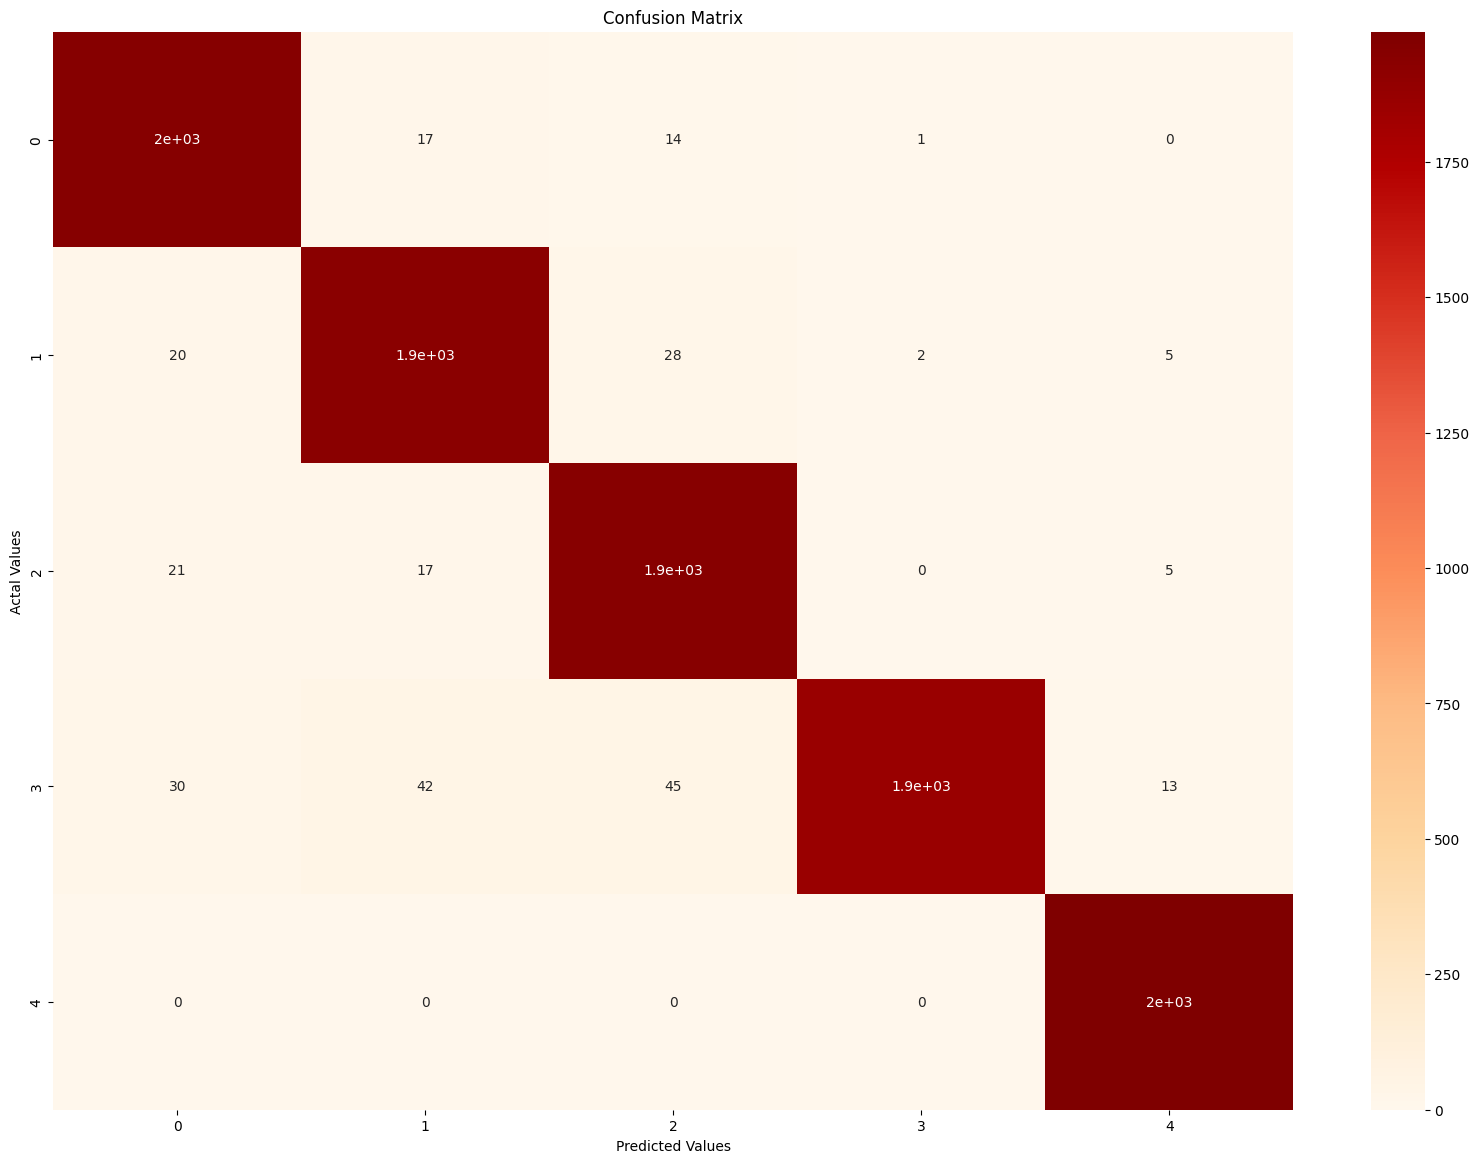

In [62]:
CM_df = pd.DataFrame(CM,index = ['0','1','2','3','4'], columns = ['0','1','2','3','4'])
plt.figure(figsize=(20,14))
sns.heatmap(CM_df, annot=True, cmap="OrRd")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [63]:
print(CR)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1990
           1       0.96      0.97      0.97      1989
           2       0.96      0.98      0.97      1990
           3       1.00      0.93      0.97      1990
           4       0.99      1.00      0.99      1990

    accuracy                           0.97      9949
   macro avg       0.97      0.97      0.97      9949
weighted avg       0.97      0.97      0.97      9949



In [64]:
_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class: Anti-Immigrants
Accuracy: 341/351

Class: Self Victimization
Accuracy: 321/352

Class: Blame
Accuracy: 345/351

Class: Non Immigrant Related
Accuracy: 266/351

Class: Pro-Immigrants
Accuracy: 351/351



In [65]:
preds_flat = np.argmax(predictions, axis=1).flatten()
preds_flat

array([0, 1, 0, ..., 1, 1, 1])

In [66]:
CM = confusion_matrix( true_vals, preds_flat)
CR = classification_report( true_vals, preds_flat)

In [67]:
print(CM)

[[341   3   5   2   0]
 [ 14 321  10   6   1]
 [  4   1 345   0   1]
 [ 27  29  19 266  10]
 [  0   0   0   0 351]]


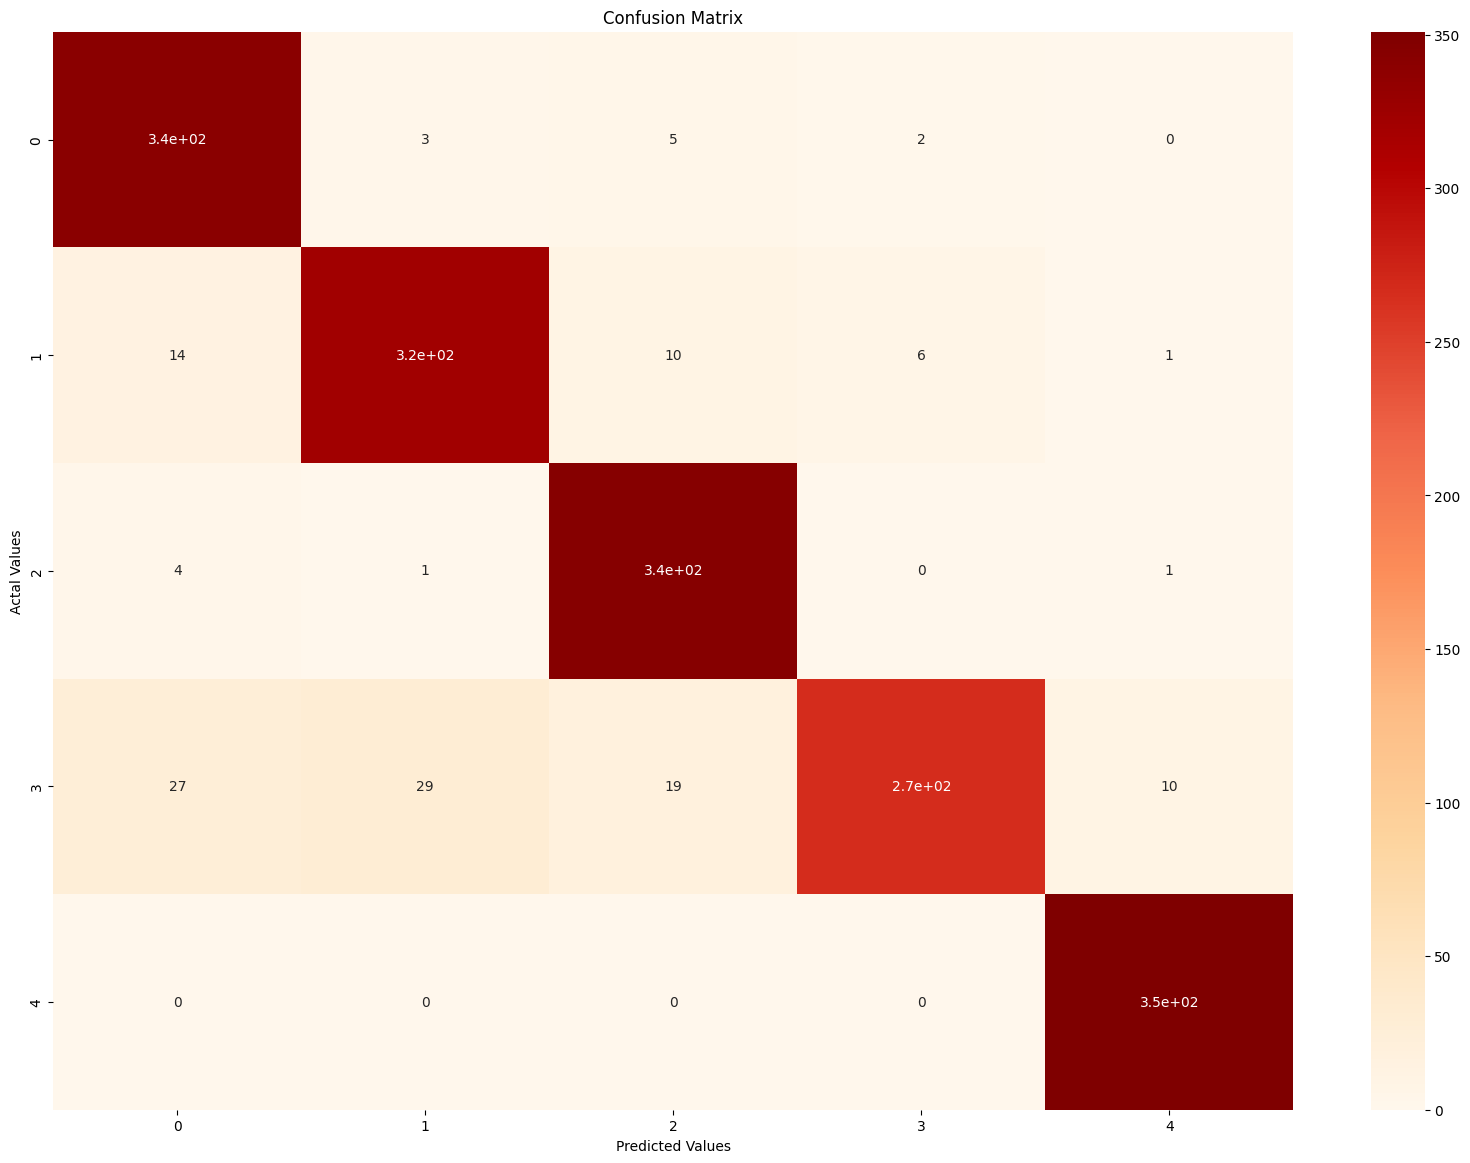

In [68]:
CM_df = pd.DataFrame(CM,index = ['0','1','2','3','4'], columns = ['0','1','2','3','4'])
plt.figure(figsize=(20,14))
sns.heatmap(CM_df, annot=True, cmap="OrRd")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [69]:
print(CR)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       351
           1       0.91      0.91      0.91       352
           2       0.91      0.98      0.95       351
           3       0.97      0.76      0.85       351
           4       0.97      1.00      0.98       351

    accuracy                           0.92      1756
   macro avg       0.93      0.92      0.92      1756
weighted avg       0.93      0.92      0.92      1756



# 13- Prediction

In [70]:
cols=['comment_message','Visibility','Interaction']
F_df = pd.read_csv(
    '/content/drive/MyDrive/CLAIRE/Keyword  Original 1.csv',
    header=None,
    names=cols
)


In [71]:
Full_df=F_df.dropna()
print(Full_df.shape)

(31855, 3)


In [72]:
text=[str(t) for t in Full_df.comment_message.values]

In [73]:
t=text
Full_df['comment_message']=text_Preprocessing(t)

In [74]:
Full_df = Full_df.dropna()
Full_df.head()

,comment_message,Visibility,Interaction
0,look like uniglo new outlet opened singapore c...,7.335974,0.778151
1,smell nice mehno wonder race shit everywhere,7.335974,1.908485
2,ikea beat apple india,7.335974,0.477121
3,long queue entrance long queue counter due bar...,7.335974,0.477121
4,leslie poon country overcrowded foreigner stil...,7.335974,1.204120


In [75]:
Full_df.shape

(31855, 3)

In [76]:
encoded_data_full = tokenizer.batch_encode_plus(
    Full_df.comment_message.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

input_ids= encoded_data_full['input_ids']
attention_masks = encoded_data_full['attention_mask']

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [77]:
labels = torch.tensor(list([0] * 31855))

In [78]:
dataset_full = TensorDataset(input_ids, attention_masks,labels)
dataloader_full = DataLoader(dataset_full,
                              sampler=RandomSampler(dataset_full),
                              batch_size=batch_size)

In [79]:
_, predictions_full, true_full = evaluate(dataloader_full)

In [80]:
len(predictions_full)

31855

In [81]:
preds_flat = np.argmax(predictions_full, axis=1).flatten()
preds_flat

array([1, 3, 3, ..., 3, 3, 1])

In [82]:
Classes = list(preds_flat)

In [83]:
Full_df['Classes']=Classes
Full_df.head()

,comment_message,Visibility,Interaction,Classes
0,look like uniglo new outlet opened singapore c...,7.335974,0.778151,1
1,smell nice mehno wonder race shit everywhere,7.335974,1.908485,3
2,ikea beat apple india,7.335974,0.477121,3
3,long queue entrance long queue counter due bar...,7.335974,0.477121,3
4,leslie poon country overcrowded foreigner stil...,7.335974,1.204120,3


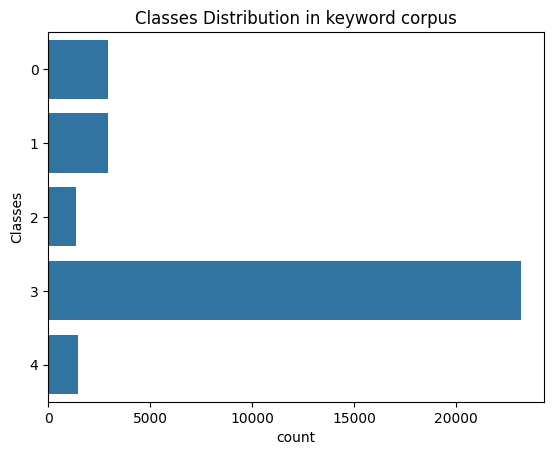

In [84]:
sns.countplot(y="Classes", data=Full_df).set_title('Classes Distribution in keyword corpus')
plt.show()

In [85]:
Full_df.to_csv('/content/drive/MyDrive/COM/keywordcorpus_Classes_Comments_Prediction1.csv')